# Importing Packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cf
from dfm_tools.get_nc import *
from dfm_tools.get_nc_helpers import *
%matplotlib inline

In [2]:
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 18, 'figure.figsize': (12.8, 9.6)})

# Save Plots?

In [3]:
save_plots = True

# Empty Cartopy plot

In [4]:
def get_map():
    ax = plt.axes(projection=ccrs.PlateCarree())
    fig = plt.gcf()
    ax.set_extent([0, 5.5, 50, 54])
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.add_feature(cf.RIVERS)
    ax.gridlines(draw_labels=True)
    
    return fig, ax

# Import data

In [5]:
data_dir = os.path.join("..", "Data")

map_nc = os.path.join(data_dir, "DCSM-FM_RW1_sept14_0005_map.nc")

# Variable list

In [6]:
varlist, dimlist = get_ncvardimlist(file_nc=map_nc)
print(varlist)

                    nc_varkeys              shape  \
0                 mesh2d_enc_x            (2352,)   
1                 mesh2d_enc_y            (2352,)   
2        mesh2d_enc_node_count               (1,)   
3   mesh2d_enc_part_node_count              (37,)   
4     mesh2d_enc_interior_ring              (37,)   
5   mesh2d_enclosure_container                 ()   
6                       Mesh2D                 ()   
7                    NetNode_x           (39477,)   
8                    NetNode_y           (39477,)   
9                        wgs84                 ()   
10                   NetNode_z           (39477,)   
11                     NetLink         (77800, 2)   
12                 NetLinkType           (77800,)   
13                 NetElemNode         (38345, 4)   
14                 NetElemLink         (38345, 4)   
15            NetLinkContour_x         (77800, 4)   
16            NetLinkContour_y         (77800, 4)   
17                  NetLink_xu           (7780

# Plotting domain

In [7]:
ugrid = get_netdata(file_nc=map_nc, multipart=True)

analyzing netdata from domain 0000 of 0004 (counting max number of facenodes)
analyzing netdata from domain 0001 of 0004 (counting max number of facenodes)
analyzing netdata from domain 0002 of 0004 (counting max number of facenodes)
analyzing netdata from domain 0003 of 0004 (counting max number of facenodes)
analyzing netdata from domain 0004 of 0004 (counting max number of facenodes)
processing netdata from domain 0000 of 0004
processing netdata from domain 0001 of 0004
processing netdata from domain 0002 of 0004
processing netdata from domain 0003 of 0004
processing netdata from domain 0004 of 0004


**Plot of the whole domain**

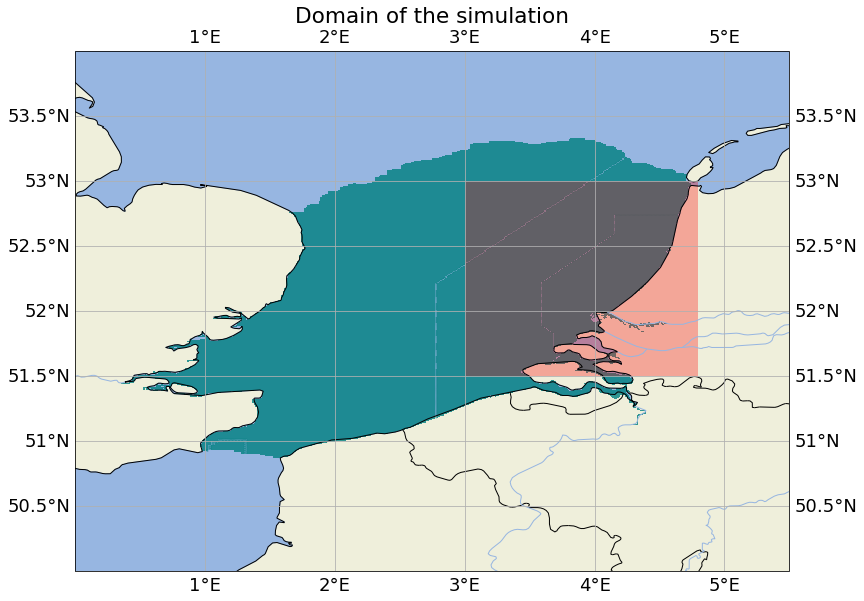

In [8]:
fig, ax = get_map()
plot_netmapdata(ugrid.verts, values=None, ax=ax, linewidth=1, facecolor="teal", alpha=0.8)
highlight = plt.Rectangle((3,51.5), 1.8, 1.5, fc='red', alpha=0.3)
ax.add_patch(highlight)
ax.set_title("Domain of the simulation")

if save_plots:
    plt.gcf().savefig("figs/domain.pdf", bbox_inches="tight")

**Zoomed into Rotterdam Waterway**

In [9]:
ROFI_extent = [3,4.8,51.5,53]

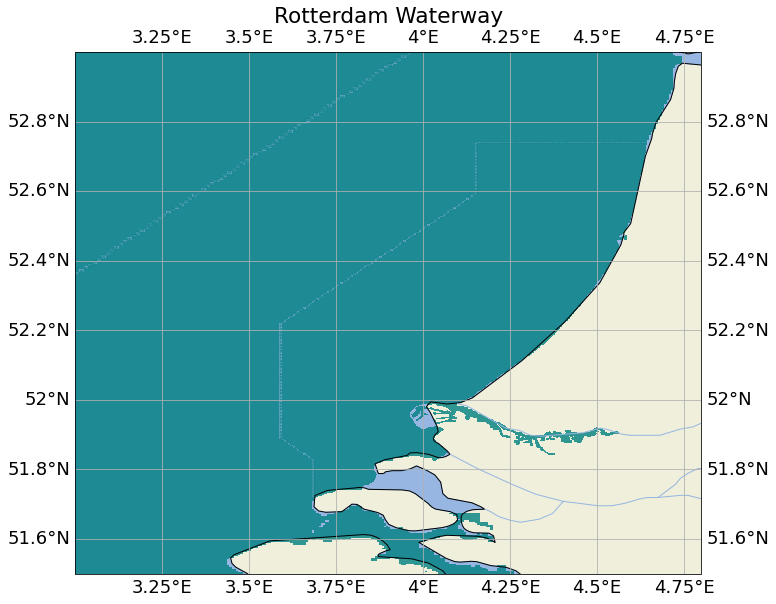

In [10]:
fig, ax = get_map()
plot_netmapdata(ugrid.verts, values=None, ax=ax, linewidth=1, facecolor="teal", alpha=0.8)
ax.set_extent(ROFI_extent)
ax.set_title("Rotterdam Waterway")

if save_plots:
    plt.gcf().savefig("figs/domain_zoomed_in.pdf", bbox_inches="tight")

# Surface Salinity at t=0

In [11]:
sal_data = get_ncmodeldata(file_nc=map_nc, varname='sa1', timestep=0, layer=19, multipart=True)

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0004
varname: sa1  (1009, 38345, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0001 of 0004
varname: sa1  (1009, 39643, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0002 of 0004
varname: sa1  (1009, 39222, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0003 of 0004
varname: sa1  (1009, 38702, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0004 of 0004
varname: sa1  (1009, 39076, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)


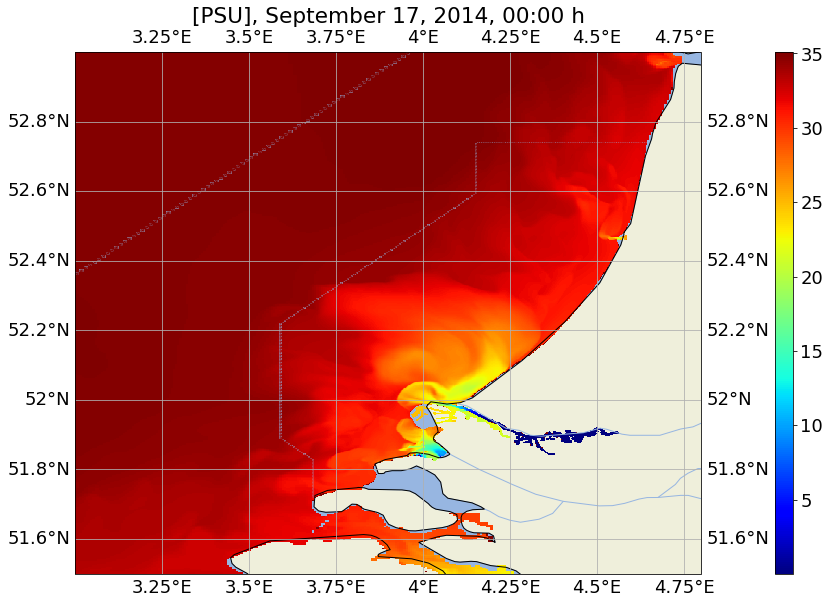

In [12]:
fig, ax = get_map()
pc = plot_netmapdata(ugrid.verts, values=sal_data[0,:,0], ax=ax, cmap='jet')
ax.set_extent(ROFI_extent)
cax = fig.add_axes([ax.get_position().x1+0.08,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(pc, cax=cax)
ax.set_title(f"[PSU], {str(sal_data.var_times.dt.strftime('%B %d, %Y, %H:%M'))[5:30]} h")

if save_plots:
    plt.gcf().savefig("figs/surface_salinity.pdf", bbox_inches="tight")

# Mixing animation

**Difference in salinity between the surface and 10 m below surface at t=0**

In [13]:
sal_data_10m = get_ncmodeldata(file_nc=map_nc, varname='sa1', timestep=0, layer=10, multipart=True)
sal_diff = sal_data_10m - sal_data

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0004
varname: sa1  (1009, 38345, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0001 of 0004
varname: sa1  (1009, 39643, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0002 of 0004
varname: sa1  (1009, 39222, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0003 of 0004
varname: sa1  (1009, 38702, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0004 of 0004
varname: sa1  (1009, 39076, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)


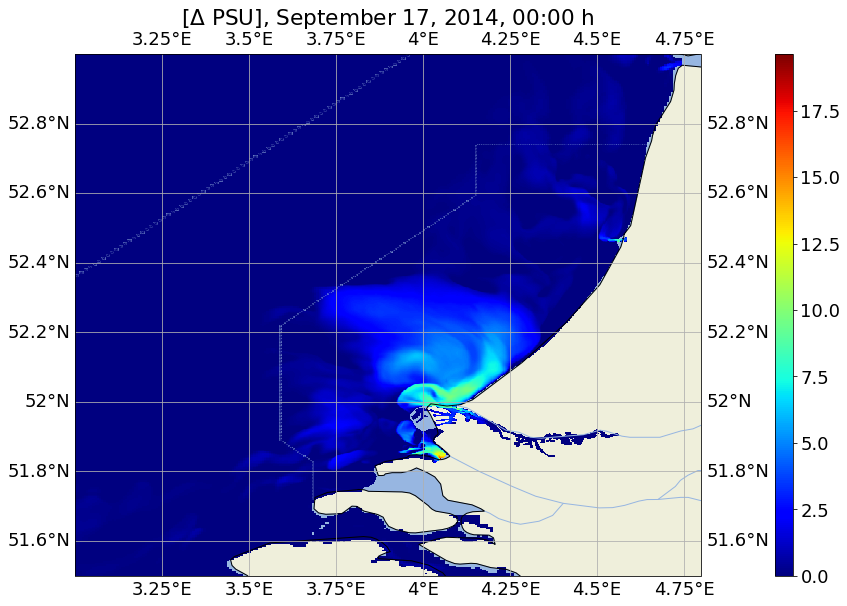

In [14]:
fig, ax = get_map()
pc = plot_netmapdata(ugrid.verts,
                     values=sal_diff[0,:,0],
                     ax=ax,
                     cmap='jet',
                     clim=(0, sal_diff[0,:,0].max()))
ax.set_extent(ROFI_extent)
cax = fig.add_axes([ax.get_position().x1+0.08,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(pc, cax=cax)
ax.set_title(f"[$\Delta$ PSU], {str(sal_data.var_times.dt.strftime('%B %d, %Y, %H:%M'))[5:30]} h")


if save_plots:
    plt.gcf().savefig("figs/diff_salinity_sept14.pdf", bbox_inches="tight")

**Doing the same, but for the whole two weeks of the simulation**

In [15]:
sal_data_surf = get_ncmodeldata(file_nc=map_nc, varname='sa1', timestep='all', layer=19, multipart=True)
sal_data_10m = get_ncmodeldata(file_nc=map_nc, varname='sa1', timestep='all', layer=10, multipart=True)

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: reconstruct array
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0004
varname: sa1  (1009, 38345, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0001 of 0004
varname: sa1  (1009, 39643, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0002 of 0004
varname: sa1  (1009, 39222, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0003 of 0004
varname: sa1  (1009, 38702, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0004 of 0004
varname: sa1  (1009, 39076, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
reading time di

In [16]:
sal_data_diff_times = sal_data_10m[:] - sal_data_surf[:]
sal_data_diff_times.shape

(1009, 182908, 1)

In [17]:
def update(frame):
    global ax, cax, sal_data_diff_times
    pc = plot_netmapdata(ugrid.verts,
                         sal_data_diff_times[36*frame,:,0],
                         ax=ax,
                         cmap='jet',
                         clim=(0, sal_data_diff_times[0,:,0].max()))
    cax.clear()
    plt.colorbar(pc, cax=cax)
    ax.set_title(f"{frame}")
    ax.set_title(f"[$\Delta$ PSU], {str(sal_data_surf.var_times[36*frame].strftime('%B %d, %Y, %H:%M'))} h")
    
    return pc

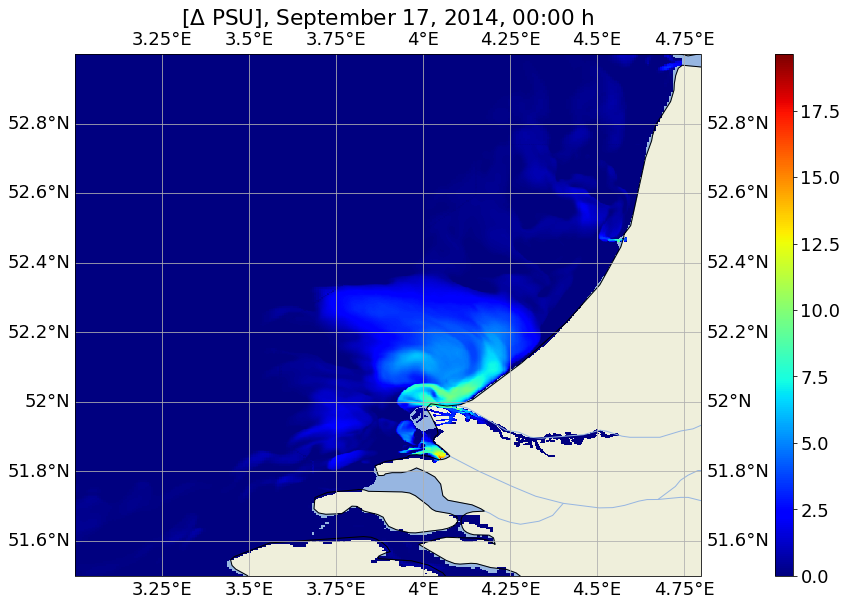

In [18]:
fig, ax = get_map()
pc = plot_netmapdata(ugrid.verts, sal_data_diff_times[0,:,0], ax=ax, cmap='jet')
ax.set_extent(ROFI_extent)
cax = fig.add_axes([ax.get_position().x1+0.08,ax.get_position().y0,0.02,ax.get_position().height])

anim = FuncAnimation(fig, update, interval=500, frames=28)
anim.save("sal.mp4", dpi=100)
plt.draw()
plt.show()

**Spring tide**

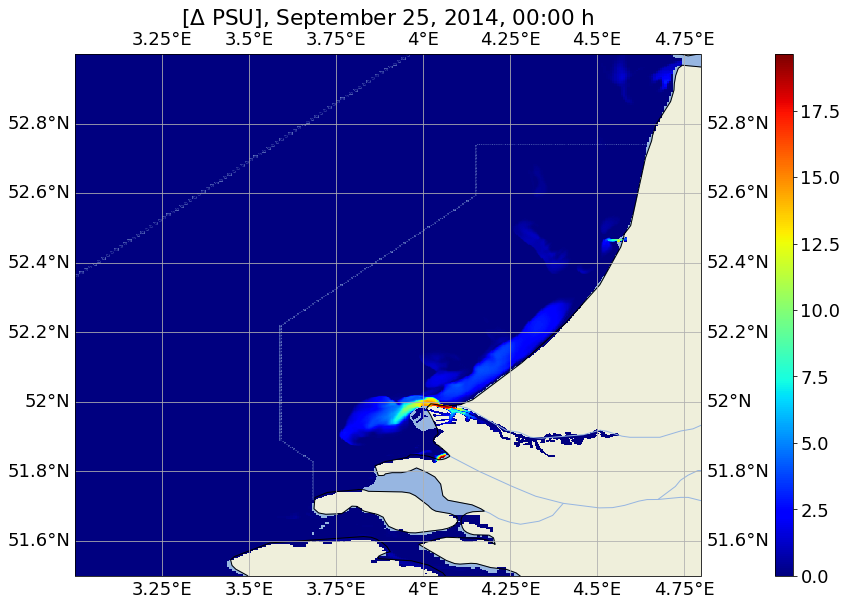

In [19]:
fig, ax = get_map()
pc = plot_netmapdata(ugrid.verts,
                     sal_data_diff_times[576,:,0],
                     ax=ax,
                     cmap='jet',
                     clim=(0, sal_data_diff_times[0,:,0].max()))
ax.set_extent(ROFI_extent)
cax = fig.add_axes([ax.get_position().x1+0.08,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(pc, cax=cax)
ax.set_title(f"[$\Delta$ PSU], {str(sal_data_surf.var_times[576].strftime('%B %d, %Y, %H:%M'))} h")

if save_plots:
    plt.gcf().savefig("salinity_diff_spring_tide.pdf", bbox_inches="tight")

# Velocity field

In [20]:
ucx = get_ncmodeldata(file_nc=map_nc, varname='ucx', timestep=0, layer=19, multipart=True)
ucy = get_ncmodeldata(file_nc=map_nc, varname='ucy', timestep=0, layer=19, multipart=True)

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0004
varname: ucx  (1009, 38345, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0001 of 0004
varname: ucx  (1009, 39643, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0002 of 0004
varname: ucx  (1009, 39222, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0003 of 0004
varname: ucx  (1009, 38702, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
processing mapdata from domain 0004 of 0004
varname: ucx  (1009, 39076, 20)  ('time', 'nFlowElem', 'laydim'), coordinates=(FlowElem_xcc FlowElem_ycc)
reading ti